# Coding Exercises (Part 4)

## Time Series Data

### Exercise 17: Financial Time Series

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

Import the us stocks dataset (__us_stocks.csv__) and select the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__ and work through the next questions with this DataFrame!

In [1]:
import pandas as pd 
import numpy as np

In [18]:
stocks = pd.read_csv('us_stocks.csv', header=[0,1], parse_dates = [0], index_col=0).loc["31-12-2015":'31-12-2018','Adj Close']

In [23]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2015-12-31 to 2018-12-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AXP     754 non-null    float64
 1   FB      754 non-null    float64
 2   INTC    754 non-null    float64
 3   MCD     754 non-null    float64
 4   PG      754 non-null    float64
 5   WMT     754 non-null    float64
dtypes: float64(6)
memory usage: 41.2 KB


__Visualize__ the Adjusted Close of the six stocks __over time__!

In [26]:
import matplotlib.pyplot as plt

In [31]:
stocks1 = stocks.copy()

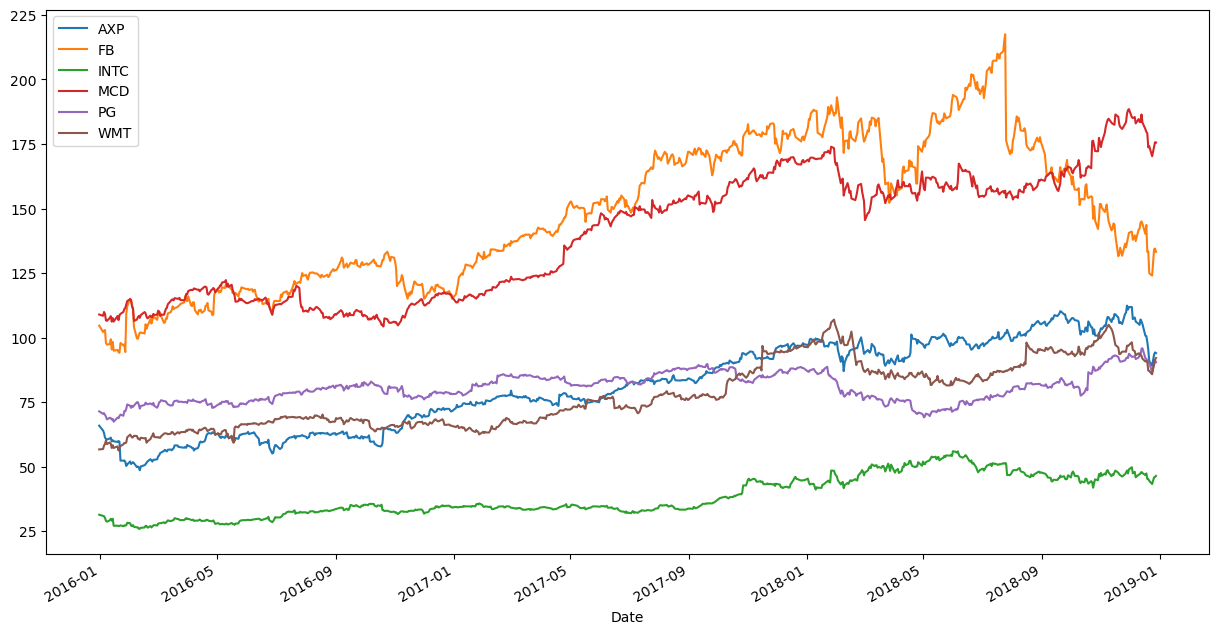

In [29]:
stocks.plot(figsize=(15,8))
plt.show()

__Visualize__ the Adjusted Close of the six stocks __over time__, starting each at the __Base Value 100__!

In [39]:
stocks.div(stocks.iloc[0]).mul(100)

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-01-04,97.181859,97.668639,98.664755,99.526001,98.690331,100.261012
2016-01-05,95.686586,98.155933,98.200317,100.897243,99.005167,102.642742
2016-01-06,93.029395,98.385245,96.023252,100.220084,98.048091,103.670463
2016-01-07,92.191810,93.560094,92.423820,97.900822,97.191791,106.084838
...,...,...,...,...,...,...
2018-12-21,138.002317,119.386578,141.733365,159.816623,126.319454,153.606893
2018-12-24,135.237135,118.536206,137.782277,156.265147,121.306666,151.297418
2018-12-26,141.794993,128.205607,146.000532,159.706504,125.097492,159.389421


In [40]:
norm= stocks.div(stocks.iloc[0]).mul(100)

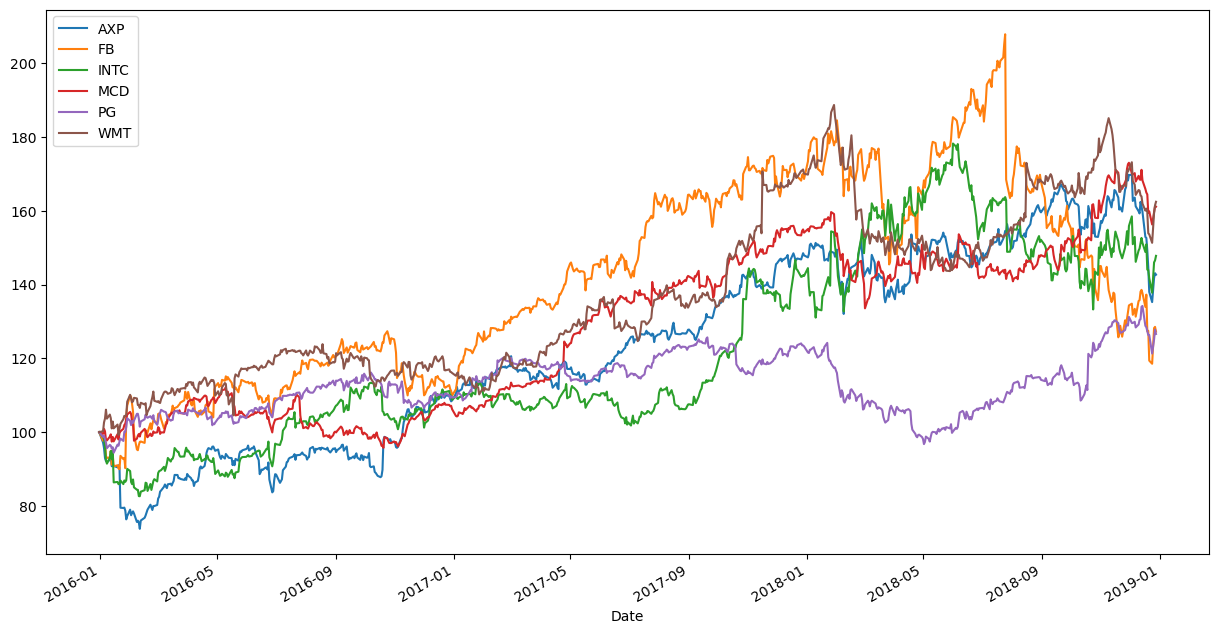

In [43]:
norm.plot(figsize=(15,8))
plt.legend(loc='upper left')
plt.show()

Calculate __monthly returns__ for all six stocks and create a new __returns__ DataFrame!

In [48]:
returns = stocks.pct_change().dropna()

In [50]:
returns.describe().T.loc[:,['mean', 'std']]

,mean,std
AXP,0.000563,0.013442
FB,0.000491,0.018346
INTC,0.000648,0.016065
MCD,0.000688,0.010495
PG,0.000359,0.009577
WMT,0.000728,0.013004


In [79]:
returns_mean_std = returns.describe().T.loc[:,['mean', 'std']]

In [80]:
returns_mean_std

,mean,std
AXP,0.000563,0.013442
FB,0.000491,0.018346
INTC,0.000648,0.016065
MCD,0.000688,0.010495
PG,0.000359,0.009577
WMT,0.000728,0.013004


Calculate the __annualized mean return__ and the __annualized standard deviation__ of returns for all six stocks!

In [81]:
returns_mean_std['mean'] = returns_mean_std['mean'] * 252
returns_mean_std['std'] = returns_mean_std['std'] * np.sqrt(252)

In [82]:
returns_mean_std

,mean,std
AXP,0.141850,0.213385
FB,0.123656,0.291240
INTC,0.163232,0.255023
MCD,0.173485,0.166597
PG,0.090468,0.152025
WMT,0.183498,0.206432


__Visualize risk/return__ of all six stocks in a (total) risk / return framework. (annualized std on the x-axis, annualized mean returns on the y-axis). <br>
Identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)

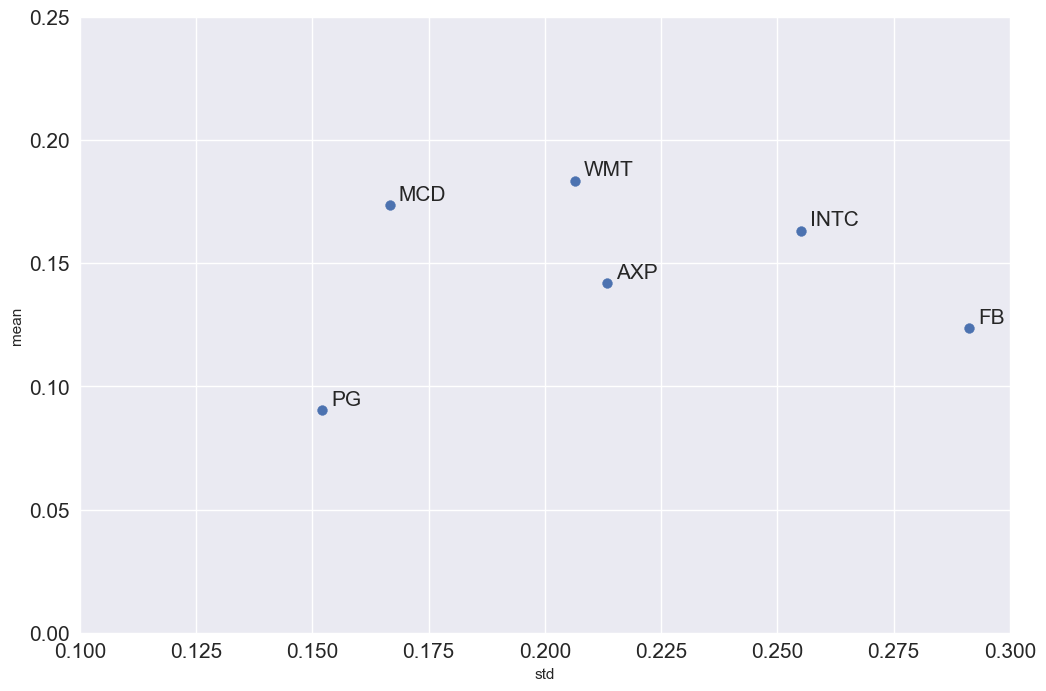

In [96]:
returns_mean_std.plot(kind='scatter', x='std', y='mean', figsize=(12,8), s=50, fontsize=15, xlim=(0.1, 0.3), ylim=(0, 0.25))
for i in returns_mean_std.index:
    plt.annotate(i, xy=(returns_mean_std.loc[i,'std']+0.002, returns_mean_std.loc[i, 'mean']+0.002), size=15)
plt.show()

__Reindex__ the DataFrame __stocks__ with all __365 calander days of 2018__. Fill NaN Values!

In [100]:
stocks.index.max()

Timestamp('2018-12-28 00:00:00')

In [101]:
year = pd.date_range(start='2015-12-31', end='2018-12-28', freq='D')
year

DatetimeIndex(['2015-12-31', '2016-01-01', '2016-01-02', '2016-01-03',
               '2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-09',
               ...
               '2018-12-19', '2018-12-20', '2018-12-21', '2018-12-22',
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28'],
              dtype='datetime64[ns]', length=1094, freq='D')

In [103]:
stocks_rein = stocks.reindex(year)
stocks_rein

,AXP,FB,INTC,MCD,PG,WMT
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,64.052849,102.220001,31.017828,108.452126,70.514938,56.870766
...,...,...,...,...,...,...
2018-12-24,89.135193,124.059998,43.315437,170.279999,86.674469,85.820000
2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-26,93.457497,134.179993,45.899059,174.029999,89.383041,90.410004
2018-12-27,94.294075,134.520004,46.067993,175.710007,91.297897,91.589996


In [105]:
stocks_rein.interpolate()

,AXP,FB,INTC,MCD,PG,WMT
2015-12-31,65.910294,104.660004,31.437597,108.968636,71.450706,56.722713
2016-01-01,65.445933,104.050003,31.332655,108.839509,71.216764,56.759726
2016-01-02,64.981572,103.440002,31.227713,108.710381,70.982822,56.796740
2016-01-03,64.517210,102.830002,31.122770,108.581254,70.748880,56.833753
2016-01-04,64.052849,102.220001,31.017828,108.452126,70.514938,56.870766
...,...,...,...,...,...,...
2018-12-24,89.135193,124.059998,43.315437,170.279999,86.674469,85.820000
2018-12-25,91.296345,129.119995,44.607248,172.154999,88.028755,88.115002
2018-12-26,93.457497,134.179993,45.899059,174.029999,89.383041,90.410004
2018-12-27,94.294075,134.520004,46.067993,175.710007,91.297897,91.589996


__Ticker Symbols__:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

------------------------